<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">1.1 - Importation des librairies</h3>
</div>

In [248]:
#Importation de la librairie Pandas
import pandas as pd
import numpy as np
import scipy.stats as stats
from scipy.stats import shapiro, probplot
from scipy.stats import pearsonr
from scipy.stats import spearmanr
from scipy.stats import chi2_contingency
from scipy.stats import f_oneway, levene
import seaborn as sns
import re
import matplotlib.pyplot as plt
import plotly.express as px

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">1.2 - Chargements des fichiers</h3>
</div>

In [251]:
#Importation du fichier customers.csv
customers = pd.read_csv('Data/customers.csv', sep=';')

#Importation du fichier products.csv
product = pd.read_csv('Data/products.csv', sep=';')

#Importation du fichier Transactions.csv
transact = pd.read_csv('Data/Transactions.csv', sep=';')

C:\Users\sounfountera080892\AppData\Local\Temp\ipykernel_9132\2539518945.py:8: DtypeWarning:

Columns (0,1,2,3) have mixed types. Specify dtype option on import or set low_memory=False.



In [252]:
customers.head()

,client_id,sex,birth
0,c_4410,f,1967
1,c_7839,f,1975
2,c_1699,f,1984
3,c_5961,f,1962
4,c_5320,m,1943


In [255]:
product.head()

,id_prod,price,categ
0,0_1421,19.99,0
1,0_1368,5.13,0
2,0_731,17.99,0
3,1_587,4.99,1
4,0_1507,3.99,0


In [257]:
transact.head()

,id_prod,date,session_id,client_id
0,0_1259,2021-03-01 00:01:07.843138,s_1,c_329
1,0_1390,2021-03-01 00:02:26.047414,s_2,c_664
2,0_1352,2021-03-01 00:02:38.311413,s_3,c_580
3,0_1458,2021-03-01 00:04:54.559692,s_4,c_7912
4,0_1358,2021-03-01 00:05:18.801198,s_5,c_2033


In [259]:
def verification_cle_primaire(df,col):
    if df[col].nunique()==df.shape[0]:
        return f'{col} est la cle primaire du data frame'
    else :
        return f'{col} n\'est la cle primaire du data frame'

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">1.3 - Données customers</h3>
</div>

In [262]:
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8621 entries, 0 to 8620
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   client_id  8621 non-null   object
 1   sex        8621 non-null   object
 2   birth      8621 non-null   int64 
dtypes: int64(1), object(2)
memory usage: 202.2+ KB


In [264]:
# Vérification de la clé primaire
verification_cle_primaire (customers,'client_id')

'client_id est la cle primaire du data frame'

In [266]:
customers.describe(include='all')

,client_id,sex,birth
count,8621,8621,8621.000000
unique,8621,2,NaN
top,c_4410,f,NaN
freq,1,4490,NaN
mean,NaN,NaN,1978.275606
std,NaN,NaN,16.917958
min,NaN,NaN,1929.000000
25%,NaN,NaN,1966.000000
50%,NaN,NaN,1979.000000
75%,NaN,NaN,1992.000000


In [268]:
customers['age'] = 2024 - customers['birth']

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">1.4 - Données product</h3>
</div>

In [271]:
product.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3286 entries, 0 to 3285
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   id_prod  3286 non-null   object 
 1   price    3286 non-null   float64
 2   categ    3286 non-null   int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 77.1+ KB


In [273]:
# Vérification de la clé primaire
verification_cle_primaire (product,'id_prod')

'id_prod est la cle primaire du data frame'

In [275]:
product.describe(include='all')

,id_prod,price,categ
count,3286,3286.000000,3286.000000
unique,3286,NaN,NaN
top,0_1421,NaN,NaN
freq,1,NaN,NaN
mean,NaN,21.863597,0.370359
std,NaN,29.849786,0.615446
min,NaN,0.620000,0.000000
25%,NaN,6.990000,0.000000
50%,NaN,13.075000,0.000000
75%,NaN,22.990000,1.000000


<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">1.5 - Données transact</h3>
</div>

In [278]:
transact.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 4 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   id_prod     687534 non-null  object
 1   date        687534 non-null  object
 2   session_id  687534 non-null  object
 3   client_id   687534 non-null  object
dtypes: object(4)
memory usage: 32.0+ MB


In [280]:
transact.isna().sum()

id_prod       361041
date          361041
session_id    361041
client_id     361041
dtype: int64

In [282]:
transact.dropna(inplace=True)

In [284]:
# Vérification de la clé primaire
verification_cle_primaire (transact,'id_prod')

"id_prod n'est la cle primaire du data frame"

In [286]:
transact.describe(include='all')

,id_prod,date,session_id,client_id
count,687534,687534,687534,687534
unique,3265,687419,345505,8600
top,1_369,2021-10-06 21:29:59.752585,s_118668,c_1609
freq,2340,2,14,25586


<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); "> 2 - Jointures des dataframes customers - products - Transactions </h3>
</div>

In [289]:
transact['date'] = pd.to_datetime(transact['date'])

In [290]:
transact['mois'] = transact['date'].dt.strftime('%Y-%m')
transact['annee'] = transact['date'].dt.strftime('%Y')
transact['dates'] = transact['date'].dt.strftime('%Y-%m-%d')

In [292]:
df_prod_transac = pd.merge(product, transact, on='id_prod', how='inner')

In [293]:
df_merge = pd.merge(df_prod_transac, customers, on='client_id', how='inner')

In [294]:
df_merge.head()

,id_prod,price,categ,date,session_id,client_id,mois,annee,dates,sex,birth,age
0,0_1421,19.99,0,2021-03-01 04:13:00.107748,s_101,c_8533,2021-03,2021,2021-03-01,m,1972,52
1,0_1421,19.99,0,2021-03-01 13:48:20.214075,s_285,c_5299,2021-03,2021,2021-03-01,f,1967,57
2,0_1421,19.99,0,2021-03-01 15:07:42.730079,s_317,c_8024,2021-03,2021,2021-03-01,f,1936,88
3,0_1421,19.99,0,2021-03-02 03:39:21.811833,s_563,c_7702,2021-03,2021,2021-03-02,f,1989,35
4,0_1421,19.99,0,2021-03-02 19:09:41.789425,s_850,c_4057,2021-03,2021,2021-03-02,m,1981,43


<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); "> 2.1 - Calcul du chiffre d’affaires total </h3>
</div>

In [300]:
print(f" Le chiffre d'affaires total est de : {round(df_merge['price'].sum())} €")

 Le chiffre d'affaires total est de : 12027663 €


<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); "> 2.2 - Calcul du chiffre d’affaires total par année </h3>
</div>

In [303]:
ca_annee = df_merge.groupby(['annee'])['price'].sum().reset_index()

In [305]:
ca_annee

,annee,price
0,2021,4944760.98
1,2022,6108681.81
2,2023,974220.31


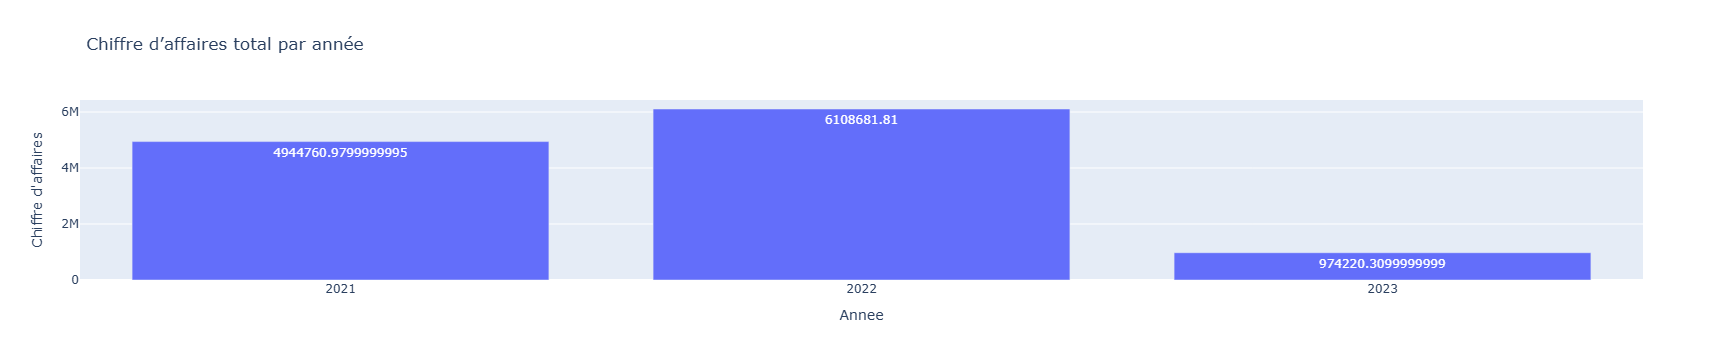

In [307]:
fig = px.bar(
    ca_annee, 
    x='annee', 
    y='price',
    title='Chiffre d’affaires total par année ',
    labels={'annee': 'Annee', 'price': 'Chiffre d\'affaires'}
)
fig.update_traces(text=ca_annee['price'], textposition='auto')
fig.show()

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); "> 2.3 - Evolution du chiffre d’affaires avec la moyenne mobile </h3>
</div>

In [310]:
df_ca = df_merge.groupby(['id_prod', 'categ', 'dates', 'mois', 'sex']).agg(quantite=('id_prod','count'),ca=('price','sum'),age_moyenne=('age','mean'), nbre_client=('client_id','count')).reset_index()

In [312]:
df_ca['ca_moyenne_mobile'] = df_ca['ca'].rolling(window=3).mean()

In [314]:
top_ca_mobile = df_ca.sort_values(by='ca_moyenne_mobile', ascending=False).reset_index().head(10)
top_ca_mobile

,index,id_prod,categ,dates,mois,sex,quantite,ca,age_moyenne,nbre_client,ca_moyenne_mobile
0,525394,2_159,2,2022-05-28,2022-05,m,2,291.98,48.500000,2,389.306667
1,527719,2_166,2,2022-12-08,2022-12,m,1,230.04,31.000000,1,383.400000
2,527718,2_166,2,2022-12-06,2022-12,m,2,460.08,23.500000,2,383.400000
3,527591,2_166,2,2021-08-30,2021-08,m,1,230.04,20.000000,1,383.400000
4,527590,2_166,2,2021-08-28,2021-08,f,2,460.08,30.500000,2,383.400000
5,524802,2_156,2,2023-02-07,2023-02,m,2,376.96,27.000000,2,376.960000
6,525393,2_159,2,2022-05-25,2022-05,f,3,437.97,42.333333,3,340.643333
7,525275,2_159,2,2021-12-12,2021-12,f,3,437.97,40.333333,3,340.643333
8,525552,2_159,2,2023-01-06,2023-01,f,2,291.98,37.500000,2,340.643333
9,525531,2_159,2,2022-12-12,2022-12,m,1,145.99,44.000000,1,340.643333


In [316]:
ca_mobile_mois = top_ca_mobile.groupby('mois')[['ca_moyenne_mobile', 'ca']].mean().reset_index()
ca_mobile_mois.sort_values(by='mois', inplace=True)
ca_mobile_mois

,mois,ca_moyenne_mobile,ca
0,2021-08,383.400000,345.060000
1,2021-12,340.643333,437.970000
2,2022-05,364.975000,364.975000
3,2022-12,369.147778,278.703333
4,2023-01,340.643333,291.980000
5,2023-02,376.960000,376.960000


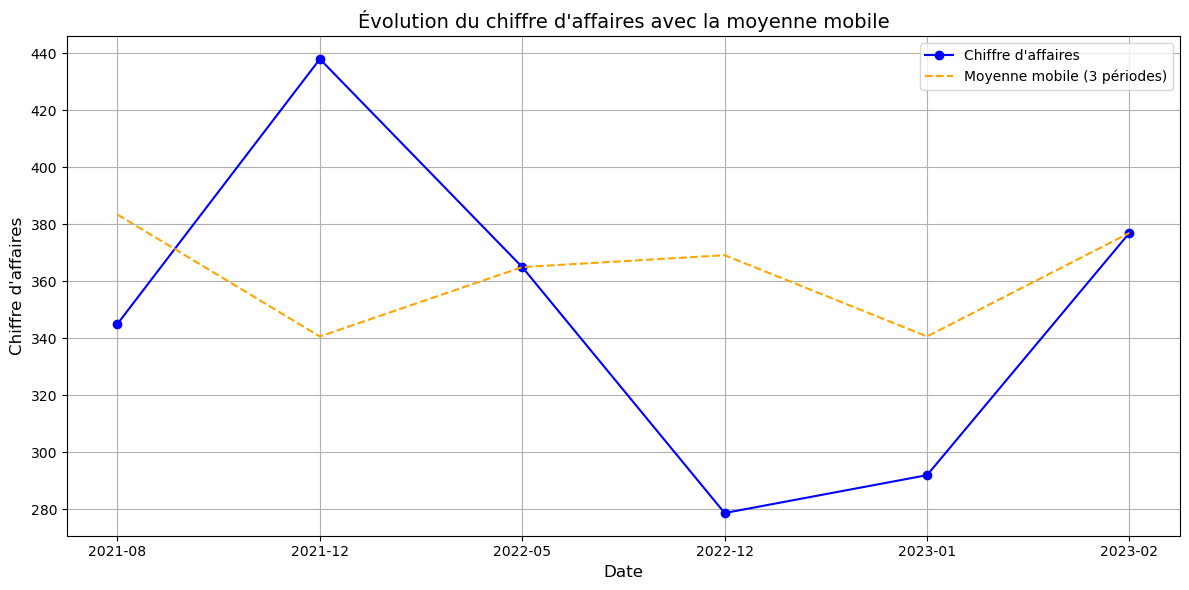

In [318]:
plt.figure(figsize=(12, 6))
plt.plot(ca_mobile_mois['mois'], ca_mobile_mois['ca'], label='Chiffre d\'affaires', color='blue', marker='o')
plt.plot(ca_mobile_mois['mois'], ca_mobile_mois['ca_moyenne_mobile'], label='Moyenne mobile (3 périodes)', color='orange', linestyle='--')
plt.title("Évolution du chiffre d'affaires avec la moyenne mobile", fontsize=14)
plt.xlabel("Date", fontsize=12)
plt.ylabel("Chiffre d'affaires", fontsize=12)
plt.legend()
plt.grid(True)
plt.tight_layout()

plt.show()

In [320]:
ca_mois = df_ca.groupby('mois')['ca'].sum().reset_index()
ca_mois.head()

,mois,ca
0,2021-03,482440.61
1,2021-04,476109.30
2,2021-05,492943.47
3,2021-06,484088.56
4,2021-07,482835.40


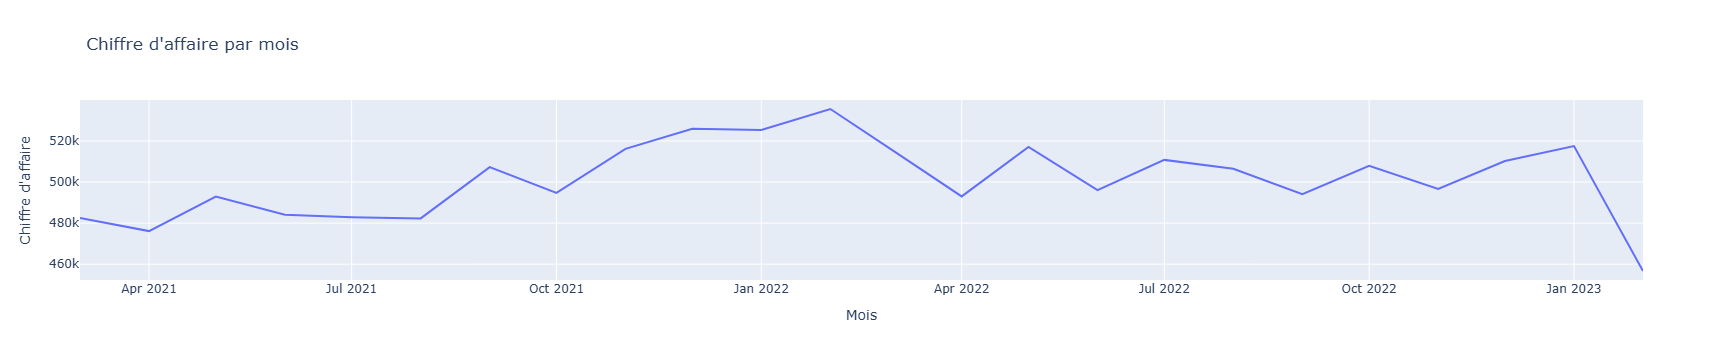

In [322]:
fig = px.line(
    ca_mois,
    x='mois',
    y='ca',
    # color='annee_mois',
    title='Chiffre d\'affaire par mois',
    labels={'mois': 'Mois', 'ca': 'Chiffre d\'affaire'}
)
fig
fig.update_traces(text=ca_mois['ca'])

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); "> 2.4 - Chiffre d’affaires mobile par mois </h3>
</div>

In [325]:
ca_mobile_mois = df_ca.groupby('mois')['ca_moyenne_mobile'].sum().reset_index()
ca_mobile_mois.head()

,mois,ca_moyenne_mobile
0,2021-03,485026.930000
1,2021-04,474972.426667
2,2021-05,493720.790000
3,2021-06,482789.440000
4,2021-07,482384.433333


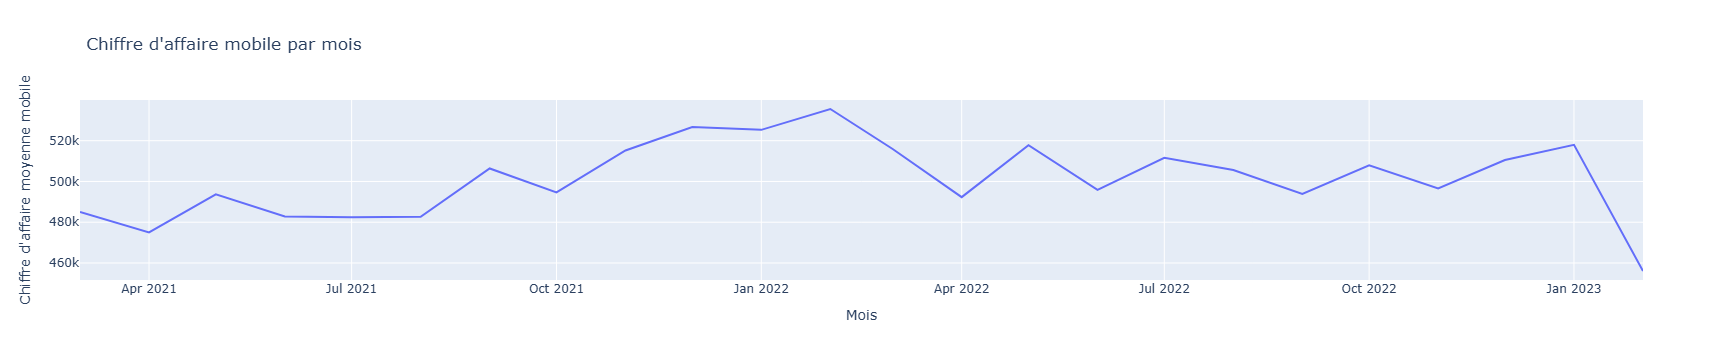

In [327]:
fig = px.line(
    ca_mobile_mois,
    x='mois',
    y='ca_moyenne_mobile',
    # color='annee_mois',
    title='Chiffre d\'affaire mobile par mois',
    labels={'mois': 'Mois', 'ca_moyenne_mobile': 'Chiffre d\'affaire moyenne mobile'}
)
fig
fig.update_traces(text=ca_mobile_mois['ca_moyenne_mobile'])

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); "> 2.5 - Chiffre d’affaires par catégorie </h3>
</div>

In [330]:
ca_categorie = df_ca.groupby('categ')['ca'].sum().reset_index()
ca_categorie.head()

,categ,ca
0,0,4419730.97
1,1,4827657.11
2,2,2780275.02


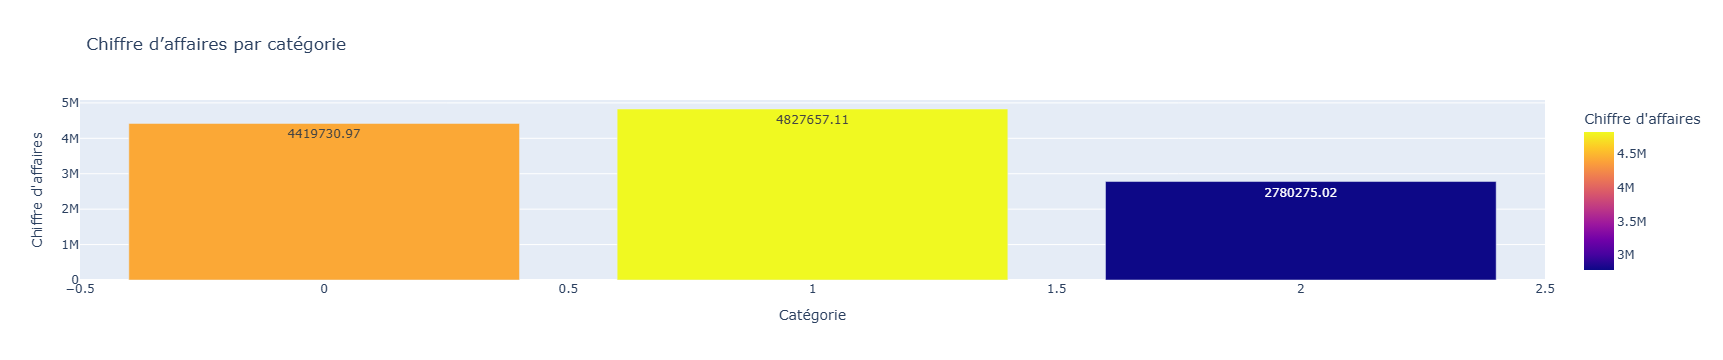

In [332]:
fig = px.bar(
    ca_categorie, 
    x='categ', 
    y='ca',
    color='ca',
    title='Chiffre d’affaires par catégorie',
    labels={'categ': 'Catégorie', 'ca': 'Chiffre d\'affaires'}
)
# Ajouter les valeurs sur les barres
fig.update_traces(text=ca_categorie['ca'], textposition='auto')
fig.show()

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); "> 2.6- Nombre de client par mois </h3>
</div>

In [335]:
df_ca['dates'] = pd.to_datetime(df_ca['dates'])

In [337]:
df_ca['annee_mois'] = df_ca['dates'].dt.to_period('M')

In [339]:
nbre_client_mois = df_ca.groupby('annee_mois')['nbre_client'].sum().reset_index()

In [341]:
nbre_client_mois.head()

,annee_mois,nbre_client
0,2021-03,28601
1,2021-04,28443
2,2021-05,28285
3,2021-06,26850
4,2021-07,24738


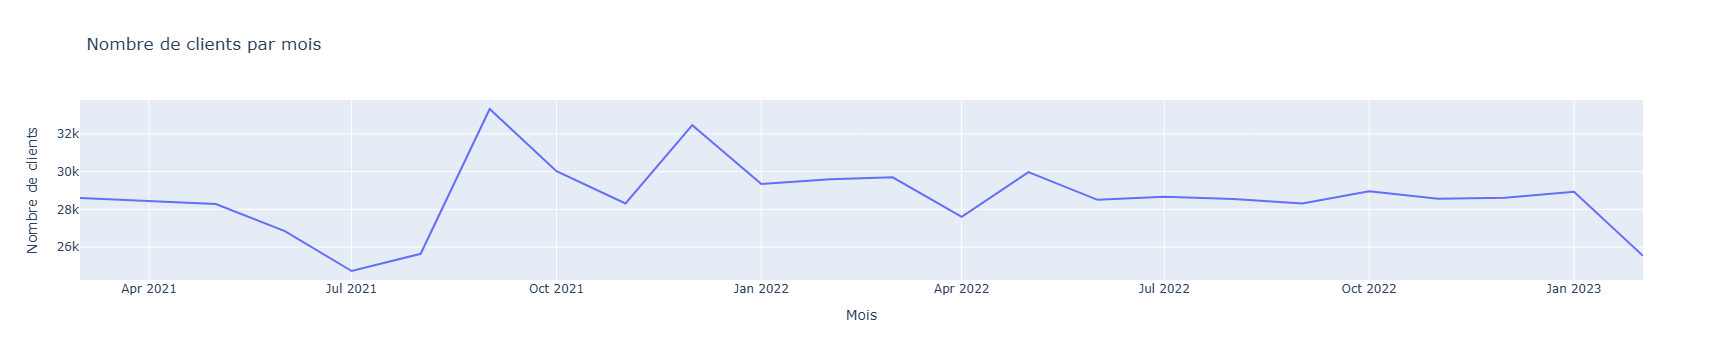

In [343]:
nbre_client_mois['annee_mois'] = nbre_client_mois['annee_mois'].astype(str)
fig = px.line(
    nbre_client_mois,
    x='annee_mois',
    y='nbre_client',
    # color='annee_mois',
    title='Nombre de clients par mois',
    labels={'annee_mois': 'Mois', 'nbre_client': 'Nombre de clients'}
)
fig
fig.update_traces(text=nbre_client_mois['nbre_client'])

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); "> 2.7 - Nombre de transactions </h3>
</div>

In [346]:
nbre_transact = df_ca.groupby('annee_mois').size().reset_index(name='nbre_transaction')
nbre_transact.head()

,annee_mois,nbre_transaction
0,2021-03,22872
1,2021-04,22862
2,2021-05,23011
3,2021-06,21526
4,2021-07,20143


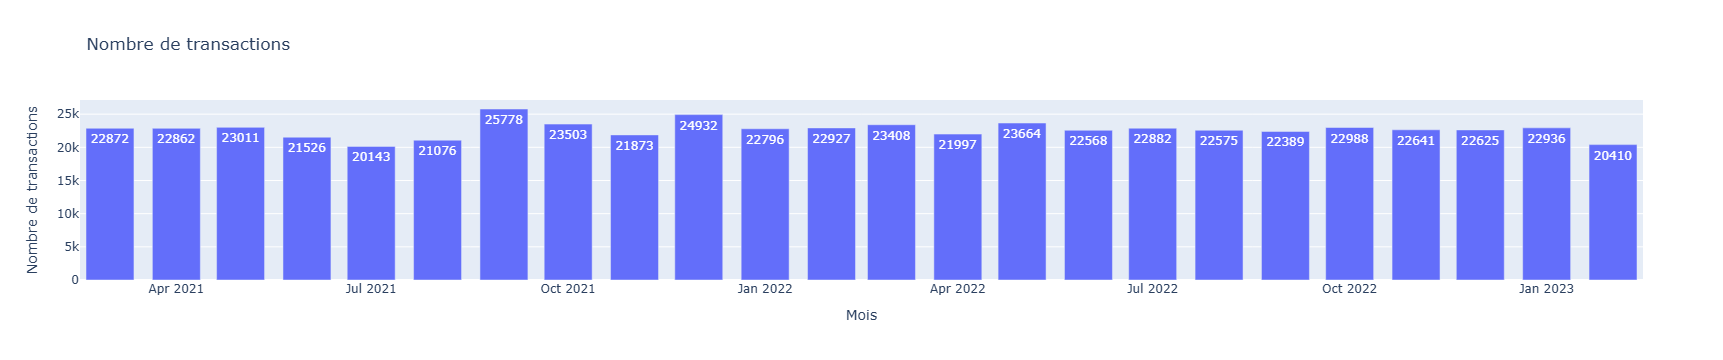

In [348]:
nbre_transact['annee_mois'] = nbre_transact['annee_mois'].astype(str)
fig = px.bar(
    nbre_transact,
    x='annee_mois',
    y='nbre_transaction',
    title='Nombre de transactions',
    labels={'annee_mois': 'Mois', 'nbre_transaction': 'Nombre de transactions'}
)
fig.update_traces(text=nbre_transact['nbre_transaction'], textposition='auto')

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); "> 2.5 - Nombre de produits vendus </h3>
</div>

In [351]:
nbr_produits_vendus = df_ca['quantite'].sum()
print('Le nombre de produits vendus est de :', nbr_produits_vendus)

Le nombre de produits vendus est de : 687534


<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); "> 3.0 - Les tops vente </h3>
</div>

In [354]:
top_ventes = df_ca.groupby('id_prod')['quantite'].sum().reset_index()

In [356]:
top = top_ventes.sort_values(by='quantite', ascending=False).head(10)
top

,id_prod,quantite
2591,1_369,2340
2644,1_417,2269
2641,1_414,2246
2733,1_498,2202
2653,1_425,2163
2629,1_403,2040
2640,1_413,2036
2639,1_412,2014
2632,1_406,2003
2633,1_407,2001


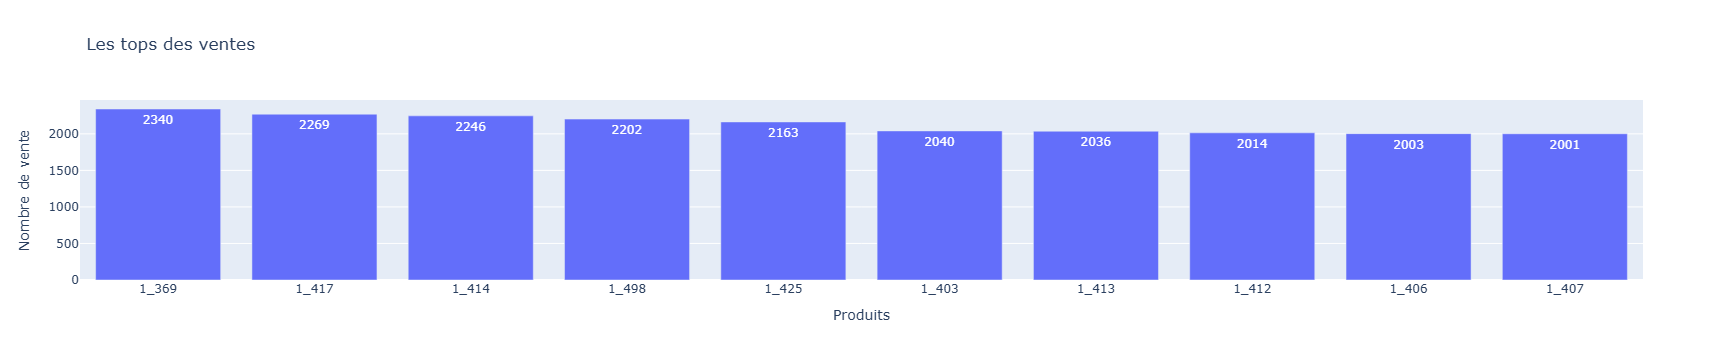

In [358]:
fig = px.bar(
    top,
    x='id_prod',
    y='quantite',
    title='Les tops des ventes',
    labels={'id_prod': 'Produits', 'quantite': 'Nombre de vente'}
)
fig.update_traces(text=top['quantite'], textposition='auto')

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); "> 3.1 - Les flops vente </h3>
</div>

In [361]:
flops = top_ventes.sort_values(by='quantite', ascending=True).head(10)
flops

,id_prod,quantite
1327,0_2201,1
802,0_1728,1
2108,0_833,1
2079,0_807,1
595,0_1539,1
698,0_1633,1
166,0_1151,1
752,0_1683,1
549,0_1498,1
3263,2_98,1


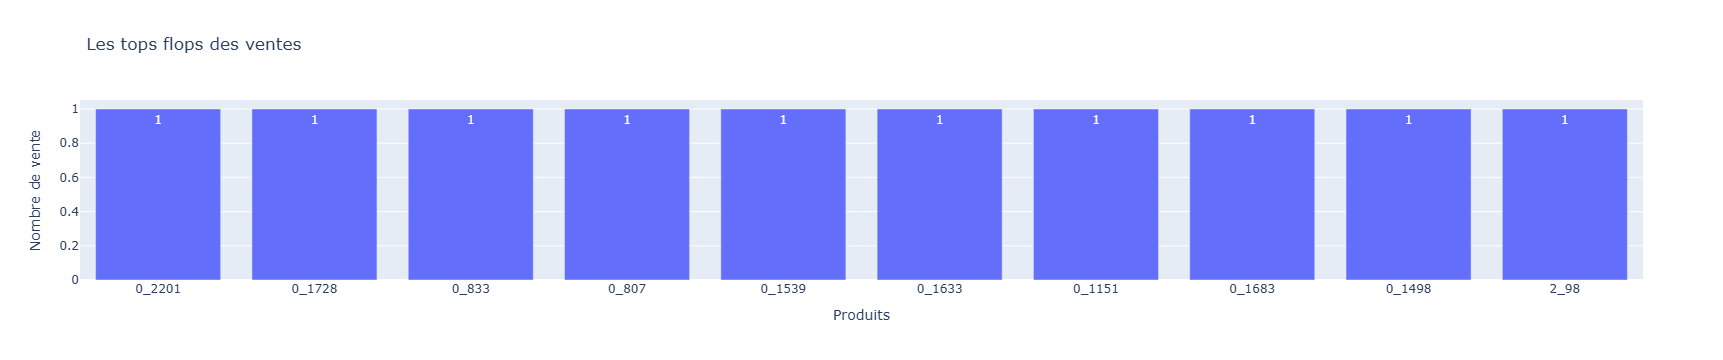

In [363]:
fig = px.bar(
    flops,
    x='id_prod',
    y='quantite',
    title='Les tops flops des ventes',
    labels={'id_prod': 'Produits', 'quantite': 'Nombre de vente'}
)
fig.update_traces(text=flops['quantite'], textposition='auto')

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); "> 3.2 - Tops CA pour chaque mois </h3>
</div>

In [366]:
top_5_ca_mois = df_ca.groupby(['annee_mois', 'id_prod'])['ca'].sum().reset_index()
mois_ca = top_5_ca_mois.sort_values(by=['annee_mois', 'ca'], ascending=False)
mois_ca = top_5_ca_mois.groupby('annee_mois').head(5)

C:\Users\sounfountera080892\AppData\Local\Temp\ipykernel_9132\3251684588.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



<Axes: xlabel='annee_mois', ylabel='ca'>

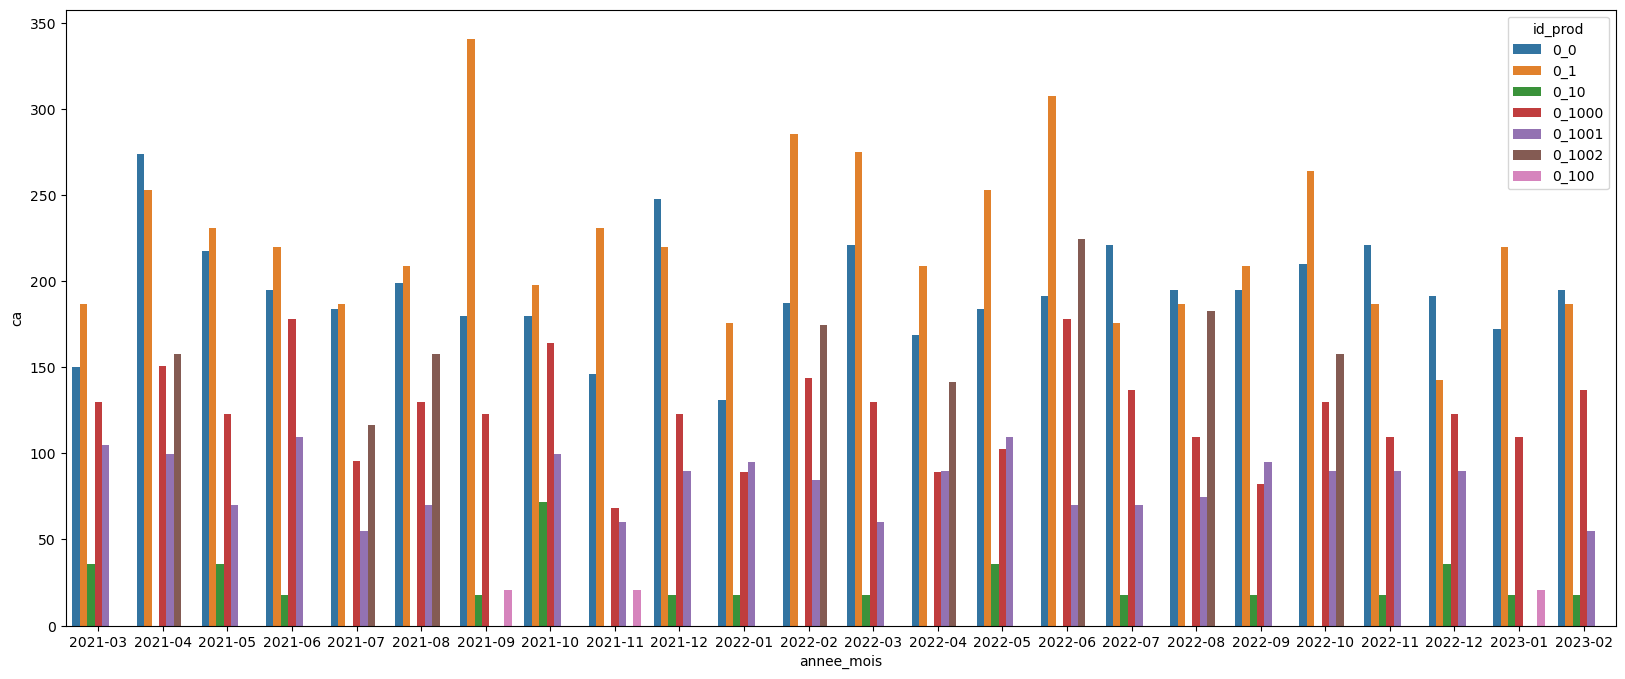

In [368]:
mois_ca['annee_mois'] = mois_ca['annee_mois'].astype(str)

plt.figure(figsize=(20,8))
sns.barplot(mois_ca, x='annee_mois', y='ca', hue='id_prod')

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); "> 3.3 - La répartition des clients par catégorie </h3>
</div>

In [371]:
client_categ = df_ca.groupby('categ')['nbre_client'].sum().reset_index()
client_categ

,categ,nbre_client
0,0,415459
1,1,235592
2,2,36483


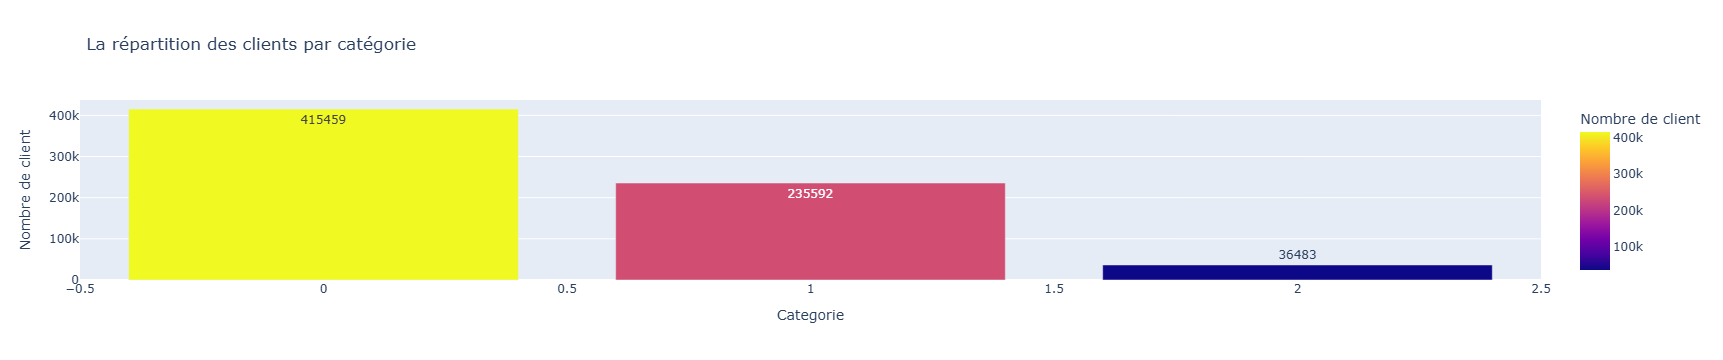

In [373]:
fig = px.bar(
    client_categ,
    x='categ',
    y='nbre_client',
    color='nbre_client',
    title='La répartition des clients par catégorie',
    labels={'categ': 'Categorie', 'nbre_client': 'Nombre de client'}
)
fig.update_traces(text=client_categ['nbre_client'], textposition='auto')

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); "> 3.4 - Répartition du chiffre d'affaire pour les clients BtoB </h3>
</div>

In [376]:
ca_clt = df_merge.groupby('client_id')['price'].sum().reset_index()
ca_clt.head()

,client_id,price
0,c_1,629.02
1,c_10,1353.60
2,c_100,254.85
3,c_1000,2291.88
4,c_1001,1823.85


<Axes: xlabel='price'>

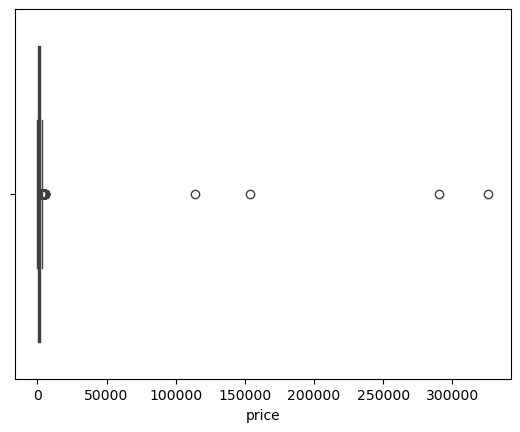

In [378]:
# Boxplot
sns.boxplot(x=ca_clt['price'])

In [380]:
def outliers(data):
    # Calculer les quartiles et l'IQR
    Q1 = np.quantile (data['price'], 0.25)
    Q3 = np.quantile (data['price'],0.75)
    IQR = Q3 - Q1
    
    # Définir les seuils pour les outliers
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Identifier les valeurs de prix qui sont des outliers
    outliers = data[(data['price'] < lower_bound) | (data['price'] > upper_bound)].sort_values('price', ascending=False).head(4)
    
    # Afficher les seuils et les outliers
    print("Seuil inférieur est de : {:.2f} ".format(lower_bound))
    print("Seuil supérieur est de : {:.2f} ".format(upper_bound))
    print(f"Le nombre de Outliers est de : {len(outliers)}")
    print("\nOutliers :")
    print(outliers)
    return outliers

In [382]:
clt_btob = outliers(ca_clt)

Seuil inférieur est de : -1289.75 
Seuil supérieur est de : 3650.20 
Le nombre de Outliers est de : 4

Outliers :
     client_id      price
677     c_1609  326039.89
4388    c_4958  290227.03
6337    c_6714  153918.60
2724    c_3454  114110.57


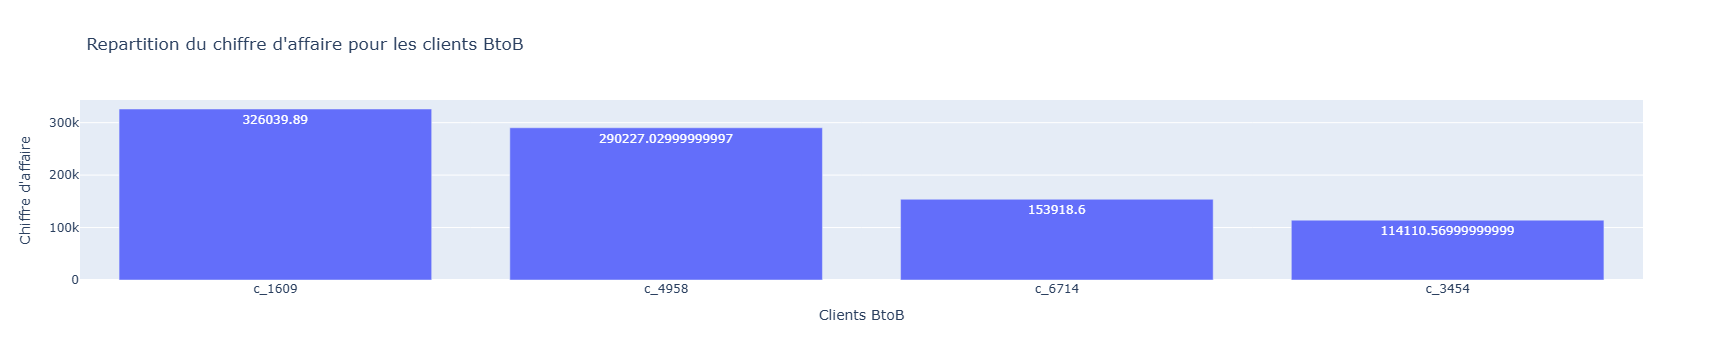

In [384]:
fig = px.bar(
    clt_btob,
    x='client_id',
    y='price',
    title='Repartition du chiffre d\'affaire pour les clients BtoB',
    labels={'client_id': 'Clients BtoB', 'price': 'Chiffre d\'affaire'}
)
fig.update_traces(text=clt_btob['price'], textposition='auto')

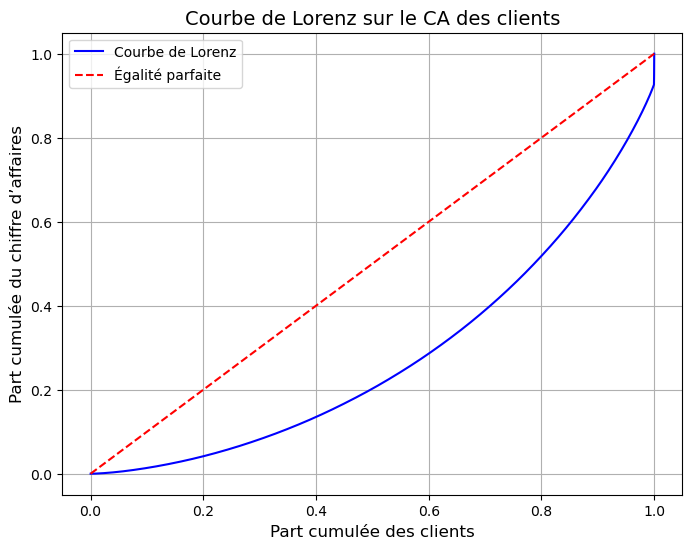

Coefficient de Gini : 0.4418958800171595


In [386]:
ca_clt.sort_values(by='price', inplace=True)
ca_clt['ca_cum'] = ca_clt['price'].cumsum() / ca_clt['price'].sum()
ca_clt['clients_cum'] = np.arange(1, len(ca_clt) + 1) / len(ca_clt)

gini = 1 - 2 * np.trapz(ca_clt['ca_cum'], ca_clt['clients_cum'])

plt.figure(figsize=(8, 6))
plt.plot(ca_clt['clients_cum'], ca_clt['ca_cum'], label='Courbe de Lorenz', color='blue')

plt.plot([0, 1], [0, 1], color='red', linestyle='--', label='Égalité parfaite')

# Personnalisation du graphique
plt.title('Courbe de Lorenz sur le CA des clients', fontsize=14)
plt.xlabel('Part cumulée des clients', fontsize=12)
plt.ylabel('Part cumulée du chiffre d’affaires', fontsize=12)
plt.legend()
plt.grid()
plt.show()
print(f"Coefficient de Gini : {gini}")

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); "> 3.5 - Test de Shapiro pour les variables continues </h3>
</div>

In [389]:
variables_num = list(df_ca.select_dtypes(include=['float64', 'int64']).columns)
variables_num.remove('categ')

C:\Users\sounfountera080892\AppData\Local\anaconda3\Lib\site-packages\scipy\stats\_axis_nan_policy.py:531: UserWarning:

scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 544382.



Variable : quantite
  - Statistique W : 0.5017
  - p-value : 0.0000
  - Conclusion : Les données ne suivent pas une distribution normale.


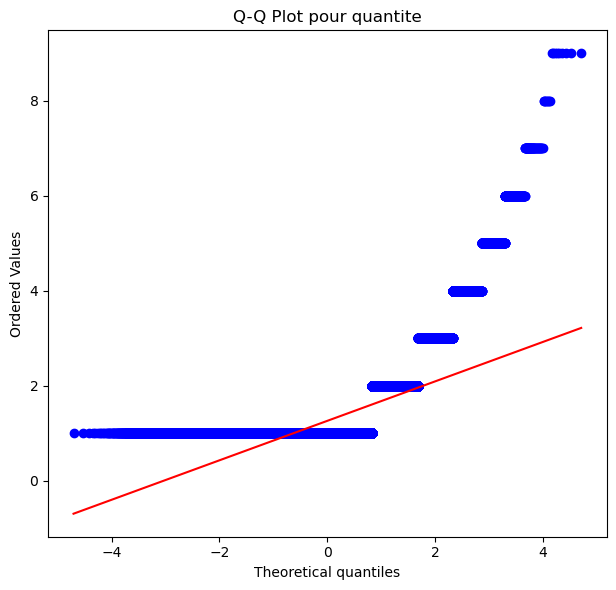

Variable : ca
  - Statistique W : 0.6042
  - p-value : 0.0000
  - Conclusion : Les données ne suivent pas une distribution normale.


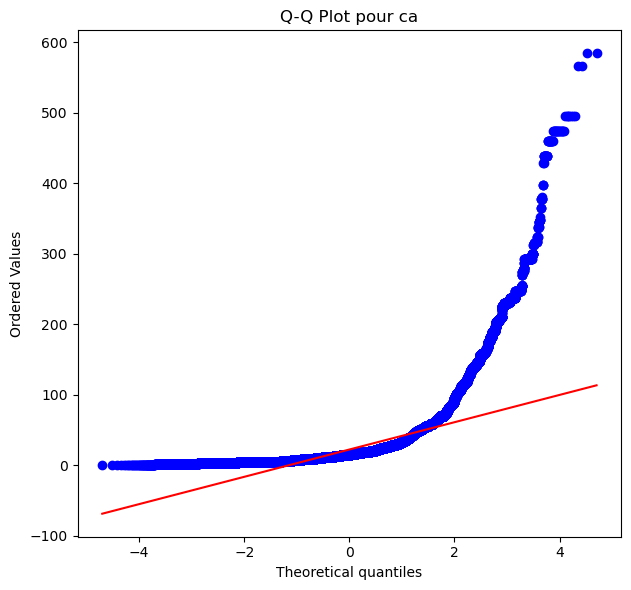

Variable : age_moyenne
  - Statistique W : 0.9762
  - p-value : 0.0000
  - Conclusion : Les données ne suivent pas une distribution normale.


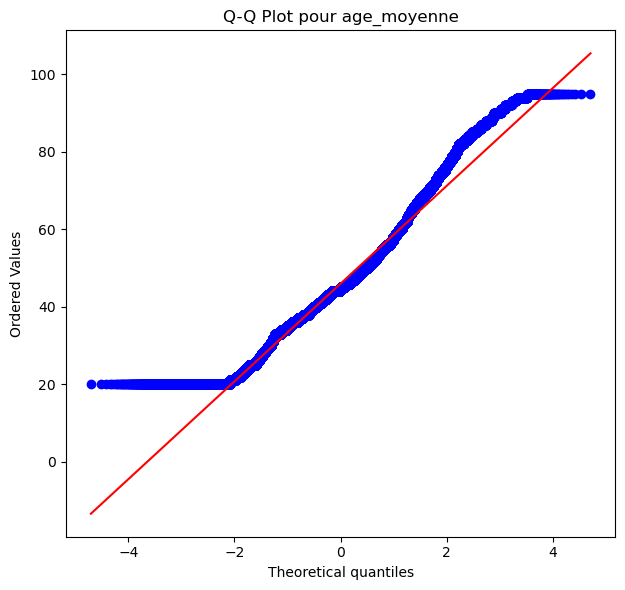

Variable : nbre_client
  - Statistique W : 0.5017
  - p-value : 0.0000
  - Conclusion : Les données ne suivent pas une distribution normale.


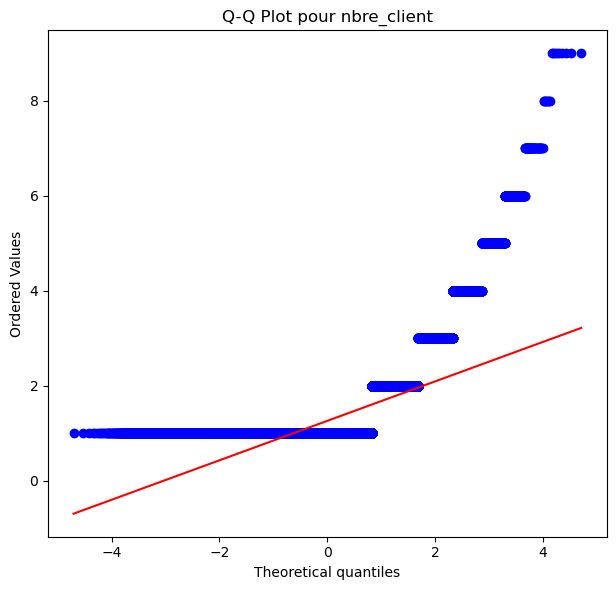

Variable : ca_moyenne_mobile
  - Statistique W : nan
  - p-value : nan
  - Conclusion : Les données ne suivent pas une distribution normale.


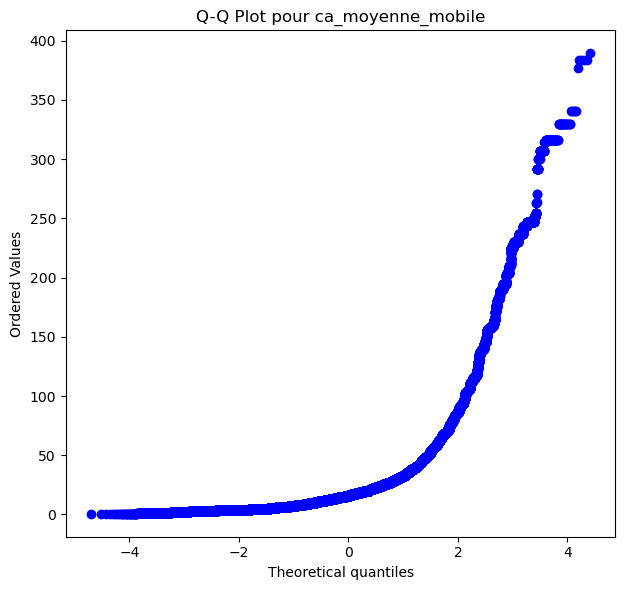

In [391]:
variables_num_resul = {}
for col in variables_num:
    # Test de Shapiro-Wilk
    stat, p = shapiro(df_ca[col])
    variables_num_resul[col] = {
        'Statistique W': stat,
        'p-value': p,
        'Normalité': 'Oui' if p > 0.005 else 'Non'
    }
    print(f"Variable : {col}")
    print(f"  - Statistique W : {stat:.4f}")
    print(f"  - p-value : {p:.4f}")
    print(f"  - Conclusion : {'Les données suivent une distribution normale.' if p > 0.005 else 'Les données ne suivent pas une distribution normale.'}")
    plt.figure(figsize=(12, 6))
# Boxplot
    # plt.subplot(1, 2, 1)
    # sns.boxplot(x=df_ca[col])
    # plt.title(f"Boxplot pour {col}")
    
# Q-Q Plot
    plt.subplot(1, 2, 1)
    probplot(df_ca[col], dist="norm", plot=plt)
    plt.title(f"Q-Q Plot pour {col}")
    
    # Ajuster l'agencement et afficher
    plt.tight_layout()
    plt.show()

In [393]:
variables_num_resul_df = pd.DataFrame(variables_num_resul).T
variables_num_resul_df

,Statistique W,p-value,Normalité
quantite,0.501661,0.0,Non
ca,0.604154,0.0,Non
age_moyenne,0.976164,0.0,Non
nbre_client,0.501661,0.0,Non
ca_moyenne_mobile,NaN,NaN,Non


<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); "> 3.6 - Le lien entre le genre d’un client et les catégories des livres achetés </h3>
</div>

In [396]:
table_contingence = pd.crosstab(df_ca['categ'], df_ca['sex'])
print("Table de contingence :")
print(table_contingence)

Table de contingence :
sex         f       m
categ                
0      170386  172566
1       86195   84410
2       14757   16068


In [400]:
chi2, p_value, dof, expected = chi2_contingency(table_contingence)

print(f"Statistique du Khi-2 : {chi2}")
print(f"Valeur-p : {p_value}")
print(f"Degrés de liberté : {dof}")
print("Table attendue (sous H0) :")
print(expected)
if p_value < 0.05:
    print("Rejet de l'hypothèse nulle : Il existe une association significative entre le genre et les catégories des livres achetés.")
else:
    print("Acceptation de l'hypothèse nulle : Pas d'association significative entre le genre et les catégories des livres achetés.")

Statistique du Khi-2 : 82.94524298432393
Valeur-p : 9.742475804474572e-19
Degrés de liberté : 2
Table attendue (sous H0) :
[[170938.62356948 172013.37643052]
 [ 85035.17656719  85569.82343281]
 [ 15364.19986333  15460.80013667]]
Rejet de l'hypothèse nulle : Il existe une association significative entre le genre et les catégories des livres achetés.


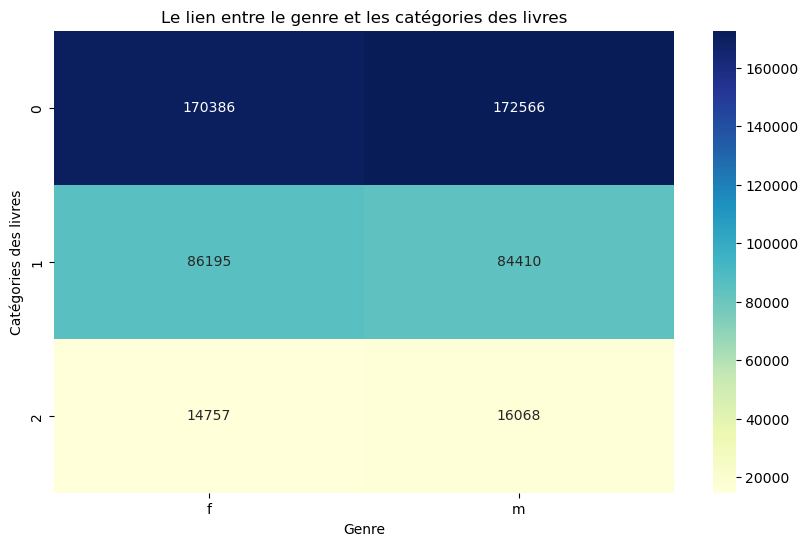

In [402]:
plt.figure(figsize=(10, 6))
sns.heatmap(table_contingence, annot=True, fmt="d", cmap="YlGnBu")
plt.title("Le lien entre le genre et les catégories des livres")
plt.xlabel("Genre")
plt.ylabel("Catégories des livres")
plt.show()

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); "> 3.7 - Test annova entre la catégoriel et la variable continues </h3>
</div>

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); "> 3.7.1 - Le lien entre la catégorie et le nombre de vente </h3>
</div>

C:\Users\sounfountera080892\AppData\Local\Temp\ipykernel_9132\1035232866.py:2: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




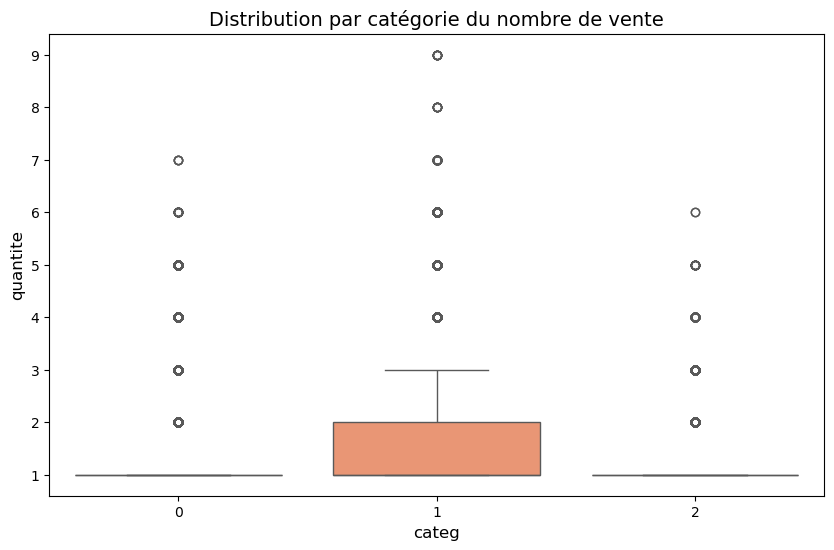

In [406]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='categ', y='quantite', data=df_ca, palette="Set2")
plt.title('Distribution par catégorie du nombre de vente', fontsize=14)
plt.xlabel('categ', fontsize=12)
plt.ylabel('quantite', fontsize=12)
plt.show()

In [408]:
for group in df_ca['categ'].unique():
    stat, p = shapiro(df_ca[df_ca['categ'] == group]['quantite'])
    print(f"Groupe {group} : p-value Shapiro = {p:.4f} ({'Normale' if p > 0.05 else 'Non normale'})")

Groupe 0 : p-value Shapiro = 0.0000 (Non normale)
Groupe 1 : p-value Shapiro = 0.0000 (Non normale)
Groupe 2 : p-value Shapiro = 0.0000 (Non normale)


C:\Users\sounfountera080892\AppData\Local\anaconda3\Lib\site-packages\scipy\stats\_axis_nan_policy.py:531: UserWarning:

scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 342952.

C:\Users\sounfountera080892\AppData\Local\anaconda3\Lib\site-packages\scipy\stats\_axis_nan_policy.py:531: UserWarning:

scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 170605.

C:\Users\sounfountera080892\AppData\Local\anaconda3\Lib\site-packages\scipy\stats\_axis_nan_policy.py:531: UserWarning:

scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 30825.



In [412]:
groups = [df_ca[df_ca['categ'] == group]['quantite'] for group in df_ca['categ'].unique()]
stat, p = levene(*groups)
print(f"Test de Levene : p-value = {p:.4f} ({'Homogènes' if p > 0.05 else 'Non homogènes'})")

stat, p = f_oneway(*groups)


print(f"Test ANOVA :")
print(f"  - Statistique F = {stat:.4f}")
print(f"  - p-value = {p:.4f}")
if p <= 0.05:
    print("Conclusion : Nous rejetons l'hypothèse nulle. Les moyennes des groupes sont significativement différentes.")
else:
    print("Conclusion : Nous ne rejetons pas l'hypothèse nulle. Les moyennes des groupes ne sont pas significativement différentes.")

Test de Levene : p-value = 0.0000 (Non homogènes)
Test ANOVA :
  - Statistique F = 5144.7903
  - p-value = 0.0000
Conclusion : Nous rejetons l'hypothèse nulle. Les moyennes des groupes sont significativement différentes.


<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); "> 3.7.2 - Lien entre categorie et chiffre d'affaire </h3>
</div>

C:\Users\sounfountera080892\AppData\Local\Temp\ipykernel_9132\2024697942.py:2: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




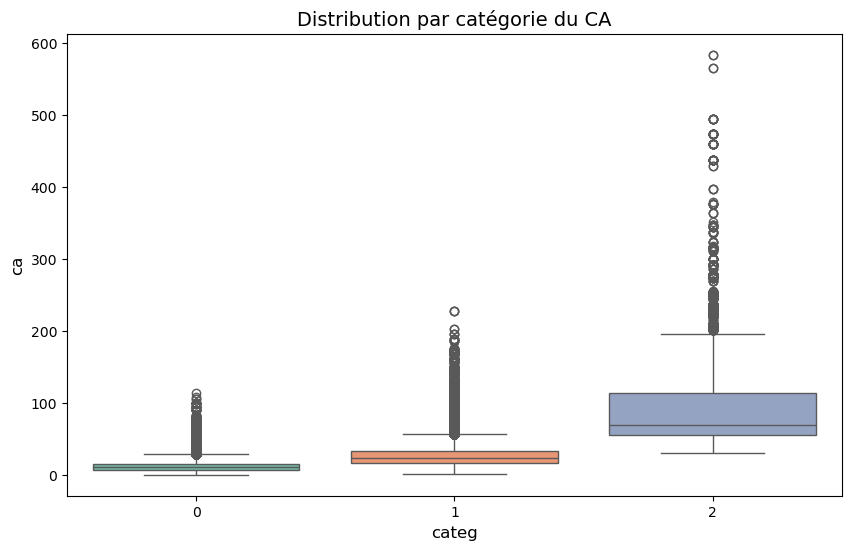

In [415]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='categ', y='ca', data=df_ca, palette="Set2")
plt.title('Distribution par catégorie du CA', fontsize=14)
plt.xlabel('categ', fontsize=12)
plt.ylabel('ca', fontsize=12)
plt.show()

In [417]:
for group in df_ca['categ'].unique():
    stat, p = shapiro(df_ca[df_ca['categ'] == group]['ca'])
    print(f"Groupe {group} : p-value Shapiro = {p:.4f} ({'Normale' if p > 0.05 else 'Non normale'})")

Groupe 0 : p-value Shapiro = 0.0000 (Non normale)
Groupe 1 : p-value Shapiro = 0.0000 (Non normale)
Groupe 2 : p-value Shapiro = 0.0000 (Non normale)


C:\Users\sounfountera080892\AppData\Local\anaconda3\Lib\site-packages\scipy\stats\_axis_nan_policy.py:531: UserWarning:

scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 342952.

C:\Users\sounfountera080892\AppData\Local\anaconda3\Lib\site-packages\scipy\stats\_axis_nan_policy.py:531: UserWarning:

scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 170605.

C:\Users\sounfountera080892\AppData\Local\anaconda3\Lib\site-packages\scipy\stats\_axis_nan_policy.py:531: UserWarning:

scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 30825.



In [424]:
groups = [df_ca[df_ca['categ'] == group]['ca'] for group in df_ca['categ'].unique()]
stat, p = levene(*groups)
print(f"Test de Levene : p-value = {p:.4f} ({'Homogènes' if p > 0.05 else 'Non homogènes'})")

stat, p = f_oneway(*groups)

print(f"Test ANOVA :")
print(f"  - Statistique F = {stat:.4f}")
print(f"  - p-value = {p:.4f}")
if p <= 0.05:
    print("Conclusion : Nous rejetons l'hypothèse nulle. Les moyennes des groupes sont significativement différentes.")
else:
    print("Conclusion : Nous ne rejetons pas l'hypothèse nulle. Les moyennes des groupes ne sont pas significativement différentes.")

Test de Levene : p-value = 0.0000 (Non homogènes)
Test ANOVA :
  - Statistique F = 305870.1440
  - p-value = 0.0000
Conclusion : Nous rejetons l'hypothèse nulle. Les moyennes des groupes sont significativement différentes.


<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); "> 3.8 - Visualiser le nombre d'achat et l'âge moyenne avec un nuance de point </h3>
</div>

In [427]:
df_clt_normal = df_merge[~df_merge['client_id'].isin(clt_btob['client_id'].tolist())]
print(df_clt_normal.shape)
df_clt_normal.head()

(640734, 12)


,id_prod,price,categ,date,session_id,client_id,mois,annee,dates,sex,birth,age
0,0_1421,19.99,0,2021-03-01 04:13:00.107748,s_101,c_8533,2021-03,2021,2021-03-01,m,1972,52
1,0_1421,19.99,0,2021-03-01 13:48:20.214075,s_285,c_5299,2021-03,2021,2021-03-01,f,1967,57
2,0_1421,19.99,0,2021-03-01 15:07:42.730079,s_317,c_8024,2021-03,2021,2021-03-01,f,1936,88
3,0_1421,19.99,0,2021-03-02 03:39:21.811833,s_563,c_7702,2021-03,2021,2021-03-02,f,1989,35
4,0_1421,19.99,0,2021-03-02 19:09:41.789425,s_850,c_4057,2021-03,2021,2021-03-02,m,1981,43


In [429]:
ca_age = df_clt_normal.groupby(['client_id']).agg(age_moyenne=('age','mean'), ca=('price','sum'), nbre_achat=('client_id','count')).reset_index()

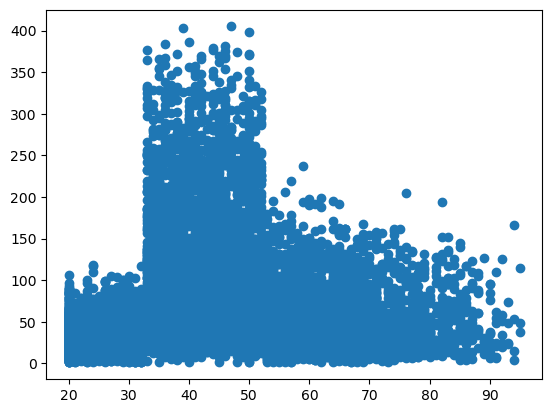

In [431]:
plt.scatter(
    ca_age['age_moyenne'], ca_age['nbre_achat']
)
plt.show()

In [435]:
# Test de Spearman
stat, p_value = spearmanr(ca_age['age_moyenne'], ca_age['nbre_achat'])

# Affichage des résultats
print("Test de Spearman entre l'âge des clients et le montant total des achats (CA) :")
print(f"  - Coefficient de corrélation (rho) : {stat:.4f}")
print(f"  - p-value : {p_value:.4f}")

# Conclusion sur la corrélation
seuil = 0.05
if p_value <= seuil:
    print("Conclusion : Il existe une corrélation monotone significative entre l'âge des clients et le nombre d'achat.")
else:
    print("Conclusion : Aucune corrélation monotone significative entre l'âge des clients et le le nombre d'achat.")

Test de Spearman entre l'âge des clients et le montant total des achats (CA) :
  - Coefficient de corrélation (rho) : 0.1277
  - p-value : 0.0000
Conclusion : Il existe une corrélation monotone significative entre l'âge des clients et le nombre d'achat.


<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); "> 3.9 - Le lien entre l'âge des clients et le montant total des achats </h3>
</div>

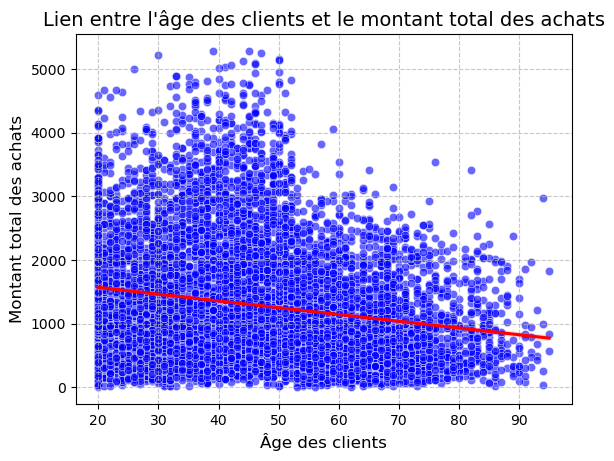

In [438]:
# Nuage de points
sns.scatterplot(x='age_moyenne', y='ca', data=ca_age, alpha=0.6, color='blue')

# Ajouter une droite de tendance (si relation linéaire attendue)
sns.regplot(x='age_moyenne', y='ca', data=ca_age, scatter=False, color='red')

# Graphique
plt.title("Lien entre l'âge des clients et le montant total des achats", fontsize=14)
plt.xlabel("Âge des clients", fontsize=12)
plt.ylabel("Montant total des achats", fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

In [442]:
# Test de Spearman
stat, p_value = spearmanr(ca_age['age_moyenne'], ca_age['ca'])

# Affichage des résultats
print("Test de Spearman entre l'âge des clients et le montant total des achats (CA) :")
print(f"  - Coefficient de corrélation (rho) : {stat:.4f}")
print(f"  - p-value : {p_value:.4f}")

# Conclusion sur la corrélation
seuil = 0.05
if p_value <= seuil:
    print("Conclusion : Il existe une corrélation significative entre l'âge des clients et le CA.")
else:
    print("Conclusion : Aucune corrélation significative entre l'âge des clients et le CA.")

Test de Spearman entre l'âge des clients et le montant total des achats (CA) :
  - Coefficient de corrélation (rho) : -0.1845
  - p-value : 0.0000
Conclusion : Il existe une corrélation significative entre l'âge des clients et le CA.


<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); "> 4.0 -Visualiser le nombre d'age par catégorie avec un boxplot </h3>
</div>

C:\Users\sounfountera080892\AppData\Local\Temp\ipykernel_9132\2298480992.py:2: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




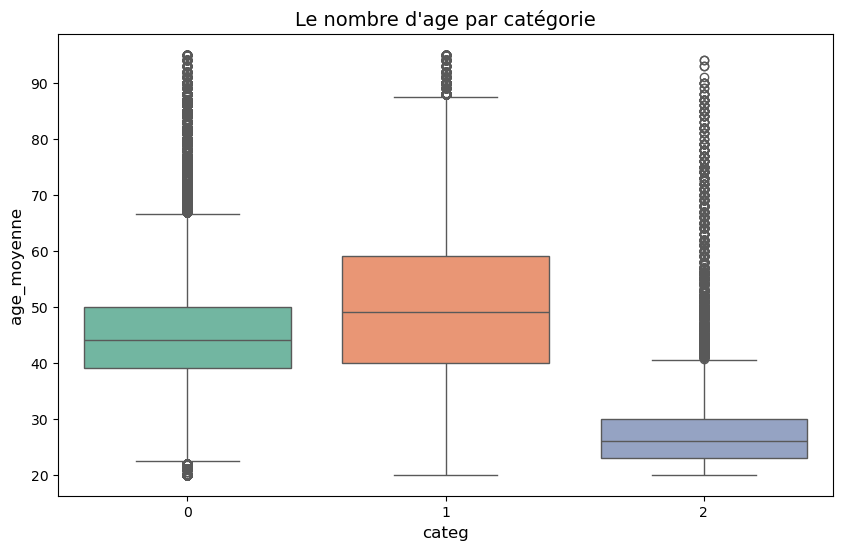

In [445]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='categ', y='age_moyenne', data=df_ca, palette="Set2")
plt.title('Le nombre d\'age par catégorie', fontsize=14)
plt.xlabel('categ', fontsize=12)
plt.ylabel('age_moyenne', fontsize=12)
plt.show()

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); "> 4.1 - Le lien entre l'âge des clients et la fréquence d’achat </h3>
</div>

In [225]:
df_age_achat = df_clt_normal.groupby('client_id').agg(age=('age','mean'), freq_achat=('session_id', 'count'))

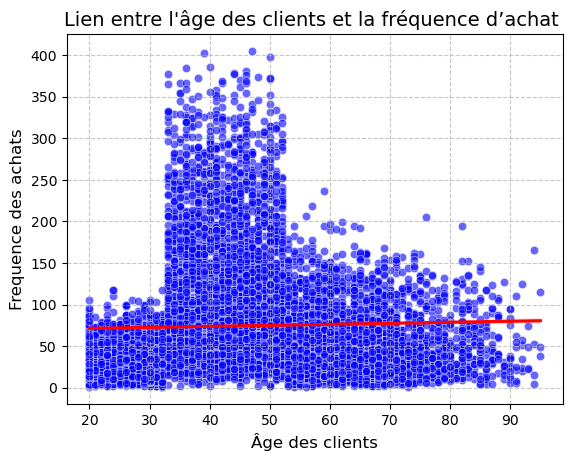

In [227]:
# Nuage de points
sns.scatterplot(x='age', y='freq_achat', data=df_age_achat, alpha=0.6, color='blue')

# Ajouter une droite de tendance (si relation linéaire attendue)
sns.regplot(x='age', y='freq_achat', data=df_age_achat, scatter=False, color='red')

# Graphique
plt.title("Lien entre l'âge des clients et la fréquence d’achat ", fontsize=14)
plt.xlabel("Âge des clients", fontsize=12)
plt.ylabel("Frequence des achats", fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

In [231]:
# Test de Spearman
stat, p_value = spearmanr(df_age_achat['age'], df_age_achat['freq_achat'])

# Résultats
print("Test de Spearman entre l'âge des clients et la fréquence d'achat :")
print(f"  - Coefficient de corrélation (rho) : {stat:.4f}")
print(f"  - p-value : {p_value:.4f}")

# Conclusion
seuil = 0.05
if p_value <= seuil:
    print("Conclusion : Il existe une corrélation significative entre l'âge des clients et la fréquence d'achat.")
else:
    print("Conclusion : Aucune corrélation significative entre l'âge des clients et la fréquence d'achat.")

Test de Spearman entre l'âge des clients et la fréquence d'achat :
  - Coefficient de corrélation (rho) : 0.1277
  - p-value : 0.0000
Conclusion : Il existe une corrélation significative entre l'âge des clients et la fréquence d'achat.


<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); "> 4.2 - Le lien entre l'âge des clients et la taille du panier moyen </h3>
</div>

In [236]:
df_ca = df_merge.groupby(['id_prod', 'categ', 'dates', 'mois', 'sex']).agg(quantite=('id_prod','count'),ca=('price','sum'),age_moyenne=('age','mean'), nbre_client=('client_id','count')).reset_index()

In [238]:
df_panier = df_clt_normal.groupby('session_id').agg(age_moyenne=('age','mean'), taille_panier=('client_id', 'count'))

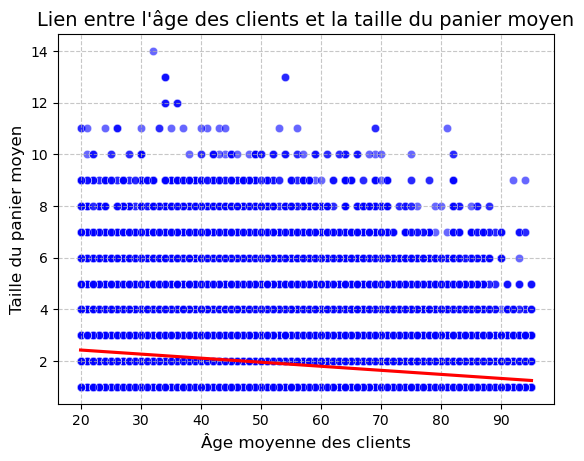

In [240]:
# Nuage de points
sns.scatterplot(x='age_moyenne', y='taille_panier', data=df_panier, alpha=0.6, color='blue')

# Ajouter une droite de tendance (si relation linéaire attendue)
sns.regplot(x='age_moyenne', y='taille_panier', data=df_panier, scatter=False, color='red')

# Graphique
plt.title("Lien entre l'âge des clients et la taille du panier moyen", fontsize=14)
plt.xlabel("Âge moyenne des clients", fontsize=12)
plt.ylabel("Taille du panier moyen", fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

In [242]:
# Test de Spearman
stat, p_value = spearmanr(df_panier['age_moyenne'], df_panier['taille_panier'])

# Résultats
print("Test de Spearman sur le lien entre l'âge des clients et la taille du panier moyen :")
print(f"  - Coefficient de corrélation (rho) : {stat:.4f}")
print(f"  - p-value : {p_value:.4f}")

# Conclusion
seuil = 0.05
if p_value <= seuil:
    print("Conclusion : Il existe une corrélation significative entre l'âge des clients et la taille du panier moyen.")
else:
    print("Conclusion : Aucune corrélation significative entre l'âge des clients et la taille du panier moyen.")

Test de Spearman sur le lien entre l'âge des clients et la taille du panier moyen :
  - Coefficient de corrélation (rho) : -0.2313
  - p-value : 0.0000
Conclusion : Il existe une corrélation significative entre l'âge des clients et la taille du panier moyen.
